In [2]:
#Loading packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
zhome_values_zip = pd.read_csv('zhome_value_zip_df.csv')

df = pd.DataFrame(zhome_values_zip)

In [14]:
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107184.0,...,257089.0,261757.0,267452.0,273750.0,279865.0,284916.0,288326.0,290250.0,290894.0,291871.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,223094.0,...,444749.0,454220.0,465824.0,479498.0,490869.0,498347.0,500609.0,498747.0,499289.0,501368.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90164.0,...,175658.0,177626.0,179773.0,183128.0,186726.0,190164.0,192396.0,194095.0,195477.0,197127.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,186206.0,...,564682.0,564481.0,566396.0,567898.0,570676.0,572891.0,574998.0,575933.0,578691.0,582277.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275596.0,...,747687.0,750970.0,756670.0,759268.0,765087.0,770360.0,775517.0,778187.0,781268.0,787104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27419,65172,30657,17762,zip,PA,PA,Hughesville,"Williamsport, PA",Lycoming County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147664.0,151285.0
27420,80190,30657,50160,zip,IA,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,NaN,...,175734.0,179142.0,180164.0,181149.0,182351.0,184956.0,186832.0,188379.0,190213.0,191794.0
27421,65355,30657,18081,zip,PA,PA,Hellertown,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Bucks County,NaN,...,354365.0,356878.0,362437.0,368824.0,372757.0,373071.0,372062.0,370075.0,369514.0,370807.0
27422,80581,30657,51009,zip,IA,IA,Calumet,NaN,O Brien County,NaN,...,71091.0,72012.0,72555.0,72780.0,72984.0,73967.0,74786.0,75141.0,74819.0,75065.0


In [18]:
before_2002 = zhome_values_zip.columns[9:33]
remaining_columns = ['RegionID', 'SizeRank', 'RegionType', 'StateName', 'Metro']

In [20]:
print(before_2002)
print(remaining_columns)

Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       '2000-11-30', '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31',
       '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
       '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31'],
      dtype='object')
['RegionID', 'SizeRank', 'RegionType', 'StateName', 'Metro']


In [21]:
# df = df.drop(df.columns[[0, 1, 3]], axis=1)

#dropping columns from data frame we dont need 8 = jan 2000. 31 = dec 2002. 0 = Regiontype. 4=statename. 6= metro. 
df = df.drop(before_2002, axis=1)
df = df.drop(remaining_columns, axis=1)

In [23]:
#new dataframe

df.columns

Index(['RegionName', 'State', 'City', 'CountyName', '2002-01-31', '2002-02-28',
       '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30',
       ...
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
       '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31'],
      dtype='object', length=254)

In [24]:
# creating new dataframe with the name of the columns replaced

#df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1)

new_column_df = df.rename({'RegionName' : 'zip', 'State' : 'state',
                                           'City' : 'city', 'CountyName' : 'borough'}, axis = 1)

In [25]:
#new dataframe with columns renamed

new_column_df

,zip,state,city,borough,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,77449,TX,NaN,Harris County,109098.0,109275.0,109851.0,110447.0,110979.0,111372.0,...,257089.0,261757.0,267452.0,273750.0,279865.0,284916.0,288326.0,290250.0,290894.0,291871.0
1,77494,TX,NaN,Fort Bend County,226810.0,226495.0,227382.0,228050.0,229150.0,229897.0,...,444749.0,454220.0,465824.0,479498.0,490869.0,498347.0,500609.0,498747.0,499289.0,501368.0
2,79936,TX,El Paso,El Paso County,85005.0,84857.0,85087.0,85249.0,85512.0,85695.0,...,175658.0,177626.0,179773.0,183128.0,186726.0,190164.0,192396.0,194095.0,195477.0,197127.0
3,11368,NY,New York,Queens County,249885.0,253132.0,255453.0,257730.0,259524.0,261847.0,...,564682.0,564481.0,566396.0,567898.0,570676.0,572891.0,574998.0,575933.0,578691.0,582277.0
4,11385,NY,New York,Queens County,333404.0,333069.0,332550.0,331469.0,333280.0,335968.0,...,747687.0,750970.0,756670.0,759268.0,765087.0,770360.0,775517.0,778187.0,781268.0,787104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27419,17762,PA,Hughesville,Lycoming County,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147664.0,151285.0
27420,50160,IA,Martensdale,Warren County,NaN,NaN,NaN,NaN,NaN,NaN,...,175734.0,179142.0,180164.0,181149.0,182351.0,184956.0,186832.0,188379.0,190213.0,191794.0
27421,18081,PA,Hellertown,Bucks County,NaN,NaN,NaN,NaN,NaN,NaN,...,354365.0,356878.0,362437.0,368824.0,372757.0,373071.0,372062.0,370075.0,369514.0,370807.0
27422,51009,IA,Calumet,O Brien County,NaN,NaN,NaN,NaN,NaN,NaN,...,71091.0,72012.0,72555.0,72780.0,72984.0,73967.0,74786.0,75141.0,74819.0,75065.0


In [26]:
#df = df.melt(id_vars=["location", "name"], 
#         var_name="Date", 
#         value_name="Value"

#replacing the '2002-01-31 colums to 'Date' and assiging their values.

df2 = new_column_df.melt(id_vars=['zip', 'state', 'city', 'borough'], 
                                                       var_name= "date", 
                                                       value_name= "home_value")

In [28]:
#new columns with dates as rows

df2.columns

Index(['zip', 'state', 'city', 'borough', 'date', 'home_value'], dtype='object')

In [31]:
df2

,zip,state,city,borough,date,home_value
0,77449,TX,NaN,Harris County,2002-01-31,109098.0
1,77494,TX,NaN,Fort Bend County,2002-01-31,226810.0
2,79936,TX,El Paso,El Paso County,2002-01-31,85005.0
3,11368,NY,New York,Queens County,2002-01-31,249885.0
4,11385,NY,New York,Queens County,2002-01-31,333404.0
...,...,...,...,...,...,...
6855995,17762,PA,Hughesville,Lycoming County,2022-10-31,151285.0
6855996,50160,IA,Martensdale,Warren County,2022-10-31,191794.0
6855997,18081,PA,Hellertown,Bucks County,2022-10-31,370807.0
6855998,51009,IA,Calumet,O Brien County,2022-10-31,75065.0


In [32]:
#changing date column to datetime
df2['date'] = pd.to_datetime(df2['date'])

In [33]:
#    li = ['Albert', 'Louis', 'John']
#    df[df.name.isin(li)]

#creating new df where only the word NY pulls from the State column.

ny_column = ['NY']

ny_home_values = df2[df2.state.isin(ny_column)]

In [34]:
#new data frame with the column, state, only has NY

ny_home_values

,zip,state,city,borough,date,home_value
3,11368,NY,New York,Queens County,2002-01-31,249885.0
4,11385,NY,New York,Queens County,2002-01-31,333404.0
11,11236,NY,New York,Kings County,2002-01-31,255687.0
14,11208,NY,New York,Kings County,2002-01-31,235676.0
15,10467,NY,New York,Bronx County,2002-01-31,174696.0
...,...,...,...,...,...,...
6855924,12724,NY,Jeffersonville,Sullivan County,2022-10-31,340127.0
6855940,14539,NY,Retsof,Livingston County,2022-10-31,152636.0
6855942,14134,NY,Chaffee,Erie County,2022-10-31,209295.0
6855979,12420,NY,Pine Bush,Ulster County,2022-10-31,425590.0


In [38]:
#selecting only 5 boro counties in county_name column
# Only NYC
five_boros = ny_home_values[ny_home_values['borough'].isin(['Queens County', 'New York County', 'Bronx County', 'Richmond County', 'Kings County'])]

In [43]:
# new dataframe
five_boros

,zip,state,city,borough,date,home_value
3,11368,NY,New York,Queens County,2002-01-31,249885.0
4,11385,NY,New York,Queens County,2002-01-31,333404.0
11,11236,NY,New York,Kings County,2002-01-31,255687.0
14,11208,NY,New York,Kings County,2002-01-31,235676.0
15,10467,NY,New York,Bronx County,2002-01-31,174696.0
...,...,...,...,...,...,...
6842233,10464,NY,New York,Bronx County,2022-10-31,609781.0
6843716,10004,NY,New York,New York County,2022-10-31,1081807.0
6845613,10006,NY,New York,New York County,2022-10-31,902566.0
6855021,11243,NY,New York,Kings County,2022-10-31,1426544.0


In [46]:
mapper = {
    "Bronx County": "BRONX",
    "Kings County":"BROOKLYN",
    "Queens County": "QUEENS",
    "Richmond County": "STATEN_ISLAND",
    "New York County": "MANHATTAN"
}

In [50]:
five_boros.loc["borough"] = five_boros["borough"].replace(mapper)

C:\Users\pumah\AppData\Local\Temp\ipykernel_1212\3791343174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_boros.loc["borough"] = five_boros["borough"].replace(mapper)


In [53]:
five_boros = five_boros.dropna()

In [54]:
five_boros.sort_values(by = ['date'], ascending = True)

,zip,state,city,borough,date,home_value
3,11368.0,NY,New York,QUEENS,2002-01-31,249885.0
2314,11105.0,NY,New York,QUEENS,2002-01-31,292062.0
2324,10010.0,NY,New York,MANHATTAN,2002-01-31,745678.0
2336,11433.0,NY,New York,QUEENS,2002-01-31,269536.0
2346,11364.0,NY,New York,QUEENS,2002-01-31,398601.0
...,...,...,...,...,...,...
6829038,10024.0,NY,New York,MANHATTAN,2022-10-31,1774559.0
6829053,11225.0,NY,New York,BROOKLYN,2022-10-31,1414856.0
6829058,10033.0,NY,New York,MANHATTAN,2022-10-31,639572.0
6828789,11691.0,NY,New York,QUEENS,2022-10-31,662710.0


<AxesSubplot: xlabel='borough'>

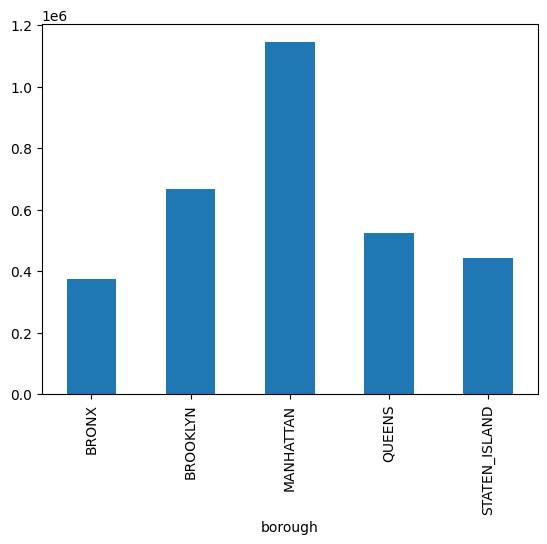

In [60]:
five_boros.groupby('borough')['home_value'].mean().plot.bar()

In [64]:
# Find average price of borough over time
formatted_monthly = five_boros["date"].dt.to_period("M")

In [73]:
monthly_mean_home_value = five_boros.groupby(formatted_monthly)["home_value"].mean().to_frame()

<AxesSubplot: xlabel='date'>

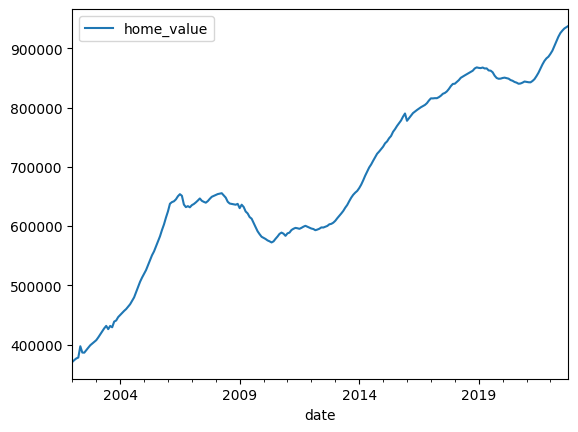

In [75]:
# The average home price in New York City after the year 2002
monthly_mean_home_value.plot.line()

In [79]:
def create_mean_borough_home_value(five_boros, boro_name):
    return five_boros[five_boros["borough"] == boro_name].groupby(formatted_monthly)["home_value"].mean().to_frame()

In [91]:
all_boros = ["BRONX", "MANHATTAN", "QUEENS", "BROOKLYN", "STATEN_ISLAND"]
avg_boro_home_price = [{"name": boro_name, "chart": create_mean_borough_home_value(five_boros, boro_name)}  for boro_name in all_boros]

AxesSubplot(0.125,0.11;0.775x0.77)


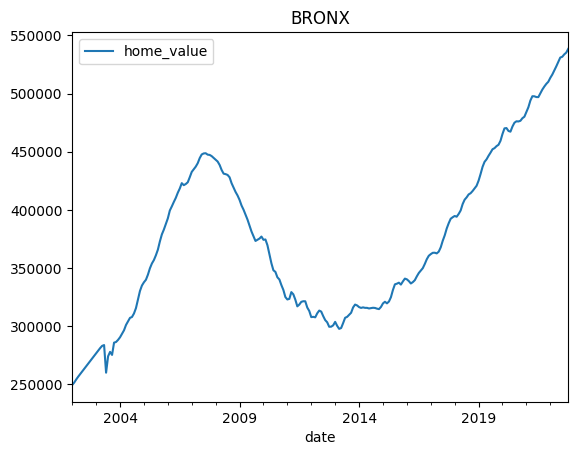

In [101]:
# Average home price of each borough over time
print(avg_boro_home_price[0]["chart"].plot.line(title=avg_boro_home_price[0]["name"]))

AxesSubplot(0.125,0.11;0.775x0.77)


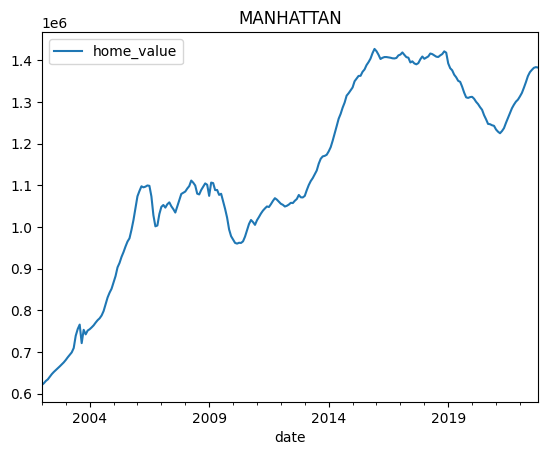

In [102]:
print(avg_boro_home_price[1]["chart"].plot.line(title=avg_boro_home_price[1]["name"]))

AxesSubplot(0.125,0.11;0.775x0.77)


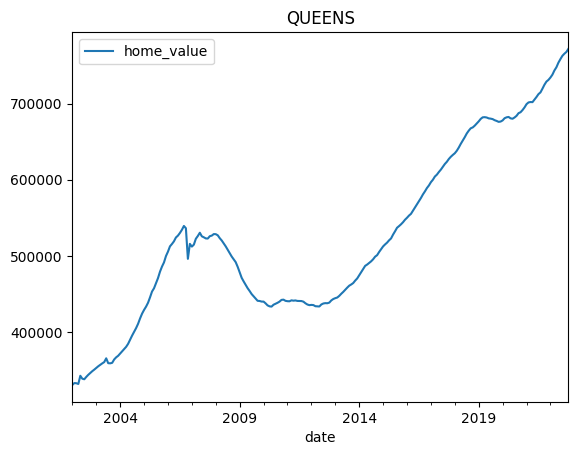

In [103]:
print(avg_boro_home_price[2]["chart"].plot.line(title=avg_boro_home_price[2]["name"]))

AxesSubplot(0.125,0.11;0.775x0.77)


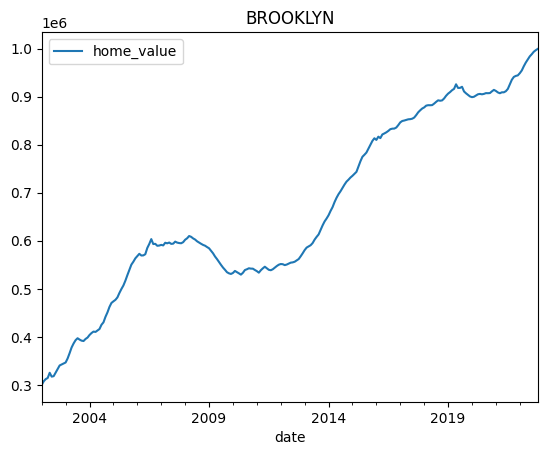

In [104]:
print(avg_boro_home_price[3]["chart"].plot.line(title=avg_boro_home_price[3]["name"]))

AxesSubplot(0.125,0.11;0.775x0.77)


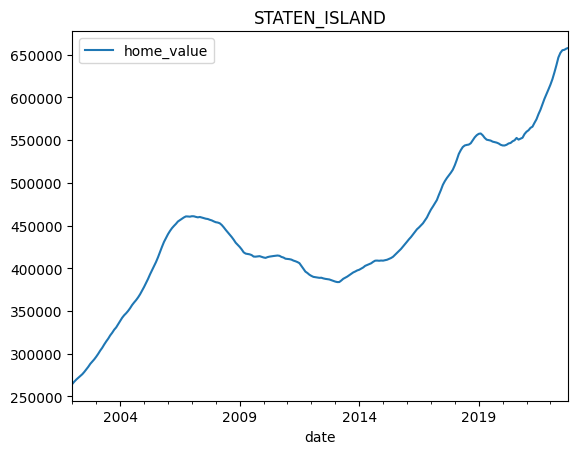

In [105]:
print(avg_boro_home_price[4]["chart"].plot.line(title=avg_boro_home_price[4]["name"]))

<AxesSubplot: xlabel='borough', ylabel='home_value'>

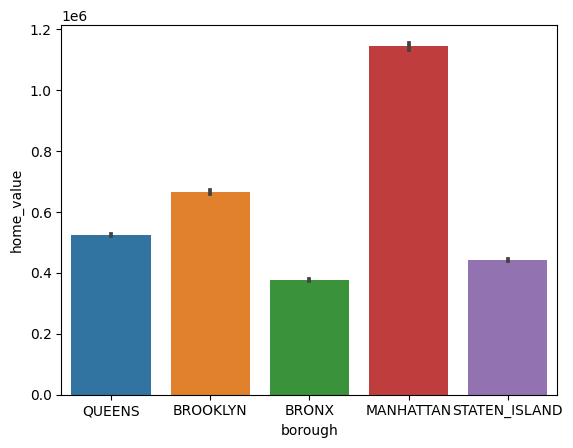

In [67]:
#chart using seaborn
#sns.barplot(data = pd.DataFrame(ex_7_1(df)).reset_index(), x = 'BOROUGH', y = 0)
sns.barplot(data = pd.DataFrame(five_boros).reset_index(), x = 'borough', y = 'home_value')

In [ ]:
# CONTINGENCY TABLE

In [ ]:
ax = sns.heatmap(my_contingency_table, cmap="Reds")
ax.set_title("Primary type vs. Location description (counts)")

In [ ]:
#### CODES i was just fooling around with

In [ ]:
axes = df_filtered.plot.line(
...     subplots=True, color={"county_name": "pink", "date": "red", "zip": "green"})

In [ ]:
drop_nulls = five_boros[five_boros["home_value"].isnull() == True]['date'].unique()

In [ ]:
drop_nulls = pd.DataFrame(drop_nulls)

In [ ]:
five_boros['county_name'] = five_boros['county_name'].astype(str)

In [ ]:
five_boros = df_filtered[df_filtered["home_value"].isnull() == True]['date'].unique()

In [ ]:
from datetime import datetime

inputDateList.sort(key=lambda date: datetime.strptime(date, "%m-%Y"))

In [ ]:
.sort_values() #when organizing data in the column 
.astype #convert from int to str to float 